# Shape Detection

#### A certain inspection application gathers black & white images of parts as they travel along a conveyor belt. It is necessary to sort the parts into following categories:
<ol>
    <li> Circular parts</li>
    <li> Rectangular parts</li>
    <li> Square parts</li>
    <li> Holes </li>
    </ol>
    
#### An example of an image that might be taken by the inspection camera is given. Propose a method to identify and locate the objects of each category in the image so that they can be picked up by a robotic system and placed in different bins. Assume that the imaging system knows where each image pixel is located on the conveyor belt at every point in time

In [4]:
#importing libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# setting the figure sizes. You can skip this cell if you want 
# but if you want to see larger images that will be easy to comprehend
# I suggest that you should run this cell

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


(<Figure size 1152x648 with 1 Axes>,
 Text(0.5, 1.0, 'Shapes Determined'),
 (-0.5, 383.5, 330.5, -0.5))

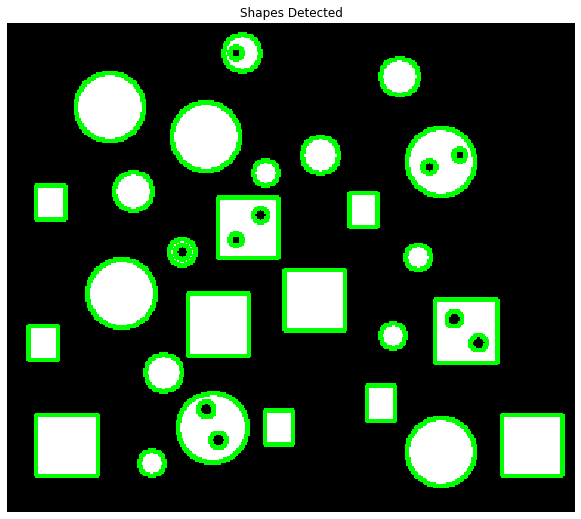

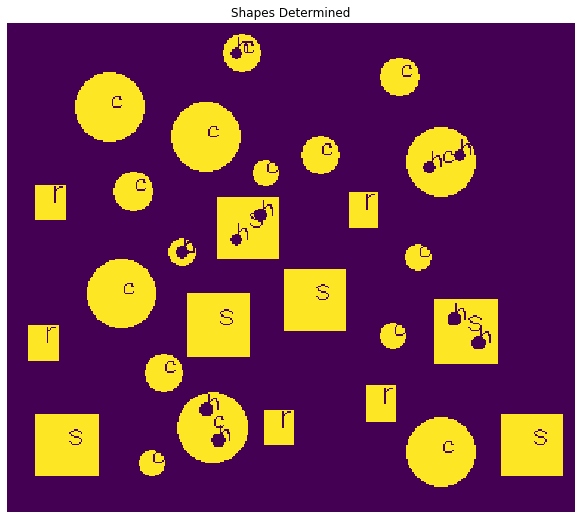

In [19]:
img = cv2.imread("images/input_image.png")
ccc = []
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(img,contours,-1,(0,255,0),2)

for c in contours:
    M = cv2.moments(c)
    
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    ccc.append([cX,cY])
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
    if len(approx)==4:
        (x, y, w, h) = cv2.boundingRect(approx)
        if  ((float(w)/h)>0.9 and (float(w)/h)<1.1):
            cv2.putText(img2, "s", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, 1)
        else:
            cv2.putText(img2, "r", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 0, 1)
    
    elif len(approx) > 6:
        if cv2.contourArea(c)<100:
            cv2.putText(img2, "h", (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        else:
            cv2.putText(img2, "c", (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    

plt.figure(2),plt.imshow(output),plt.title('Shapes Detected'),plt.axis('off')
plt.figure(1),plt.imshow(img2),plt.title('Shapes Determined'),plt.axis('off')
